<a href="https://colab.research.google.com/github/sheraphineshovan/Data_Science_Miniprojects/blob/main/CNN(Cat_vs_Dog).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

test_set.zip        100%[===================>] 217.52M  13.7MB/s    in 13s     

2023-07-28 04:53:23 (16.3 MB/s) - ‘test_set.zip’ saved [228083550/228083550]



- Load the images and verify the shapes
- Explore a few images
- Declare a model: Sequential
- Specify layers: Conv2d, Max Pooling, Dense, Dropout
- Compile the layers: Optimizer, Loss, Metrics - Accuracy
- Fit the model: x, y, validation, epochs, batch size
- Checkpointing

In [ ]:
!unzip test_set.zip
!unzip training_set.zip

Populating the interactive namespace from numpy and matplotlib


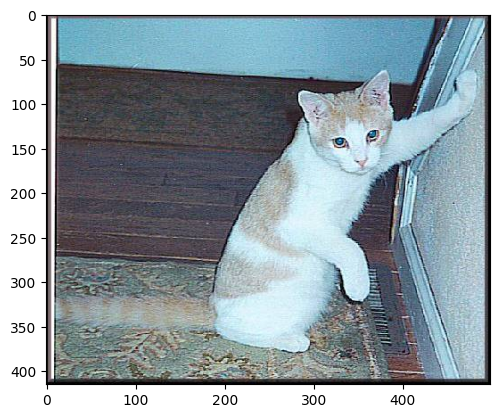

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img.shape

(415, 498, 3)

Populating the interactive namespace from numpy and matplotlib


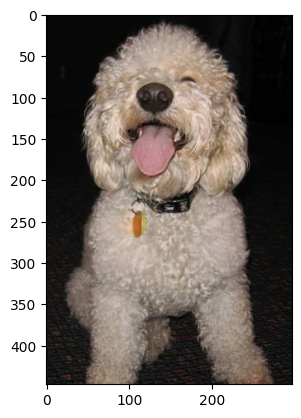

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

Load all the libraries

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()== 'channels_first':
  input_shape = (3,img__width,img_height)
else:
  input_shape = (img_width,img_height,3)

Load Images and Variations

In [ ]:
# rescaling the value to make the model less complex
train_datagen = ImageDataGenerator(rescale=1./255,shear_range = 0.2, zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])

Found 8005 images belonging to 2 classes.


In [ ]:
validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')

Found 2023 images belonging to 2 classes.


# Creating the model

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64, (3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
training =  model.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs = epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)

<ipython-input-16-b44c900428d9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training =  model.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs = epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)


Epoch 1/20
100/100 [==============================] - 31s 193ms/step - loss: 5.0450 - accuracy: 0.5590 - val_loss: 0.6612 - val_accuracy: 0.6110
Epoch 2/20
100/100 [==============================] - 17s 170ms/step - loss: 0.6529 - accuracy: 0.6120 - val_loss: 0.6266 - val_accuracy: 0.6545
Epoch 3/20
100/100 [==============================] - 19s 188ms/step - loss: 0.6358 - accuracy: 0.6514 - val_loss: 0.6174 - val_accuracy: 0.6590
Epoch 4/20
100/100 [==============================] - 19s 192ms/step - loss: 0.6368 - accuracy: 0.6490 - val_loss: 0.6223 - val_accuracy: 0.6695
Epoch 5/20
100/100 [==============================] - 18s 179ms/step - loss: 0.6271 - accuracy: 0.6600 - val_loss: 0.7172 - val_accuracy: 0.6330
Epoch 6/20
100/100 [==============================] - 17s 169ms/step - loss: 0.6543 - accuracy: 0.6520 - val_loss: 0.7452 - val_accuracy: 0.5885
Epoch 7/20
100/100 [==============================] - 17s 171ms/step - loss: 0.6536 - accuracy: 0.6257 - val_loss: 0.6753 - val_ac

<ipython-input-17-9b75c5e190e3>:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(['Accuracy'],['Validation Vccuracy'])


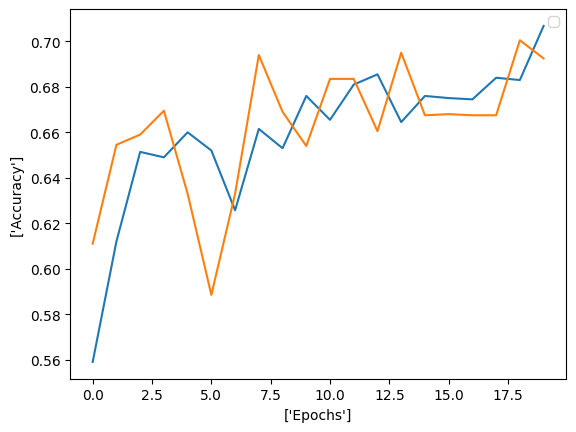

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy'],['Validation Vccuracy'])
plt.xlabel(['Epochs'])
plt.ylabel(['Accuracy'])
plt.show()

<ipython-input-18-441593d51d2c>:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(['Loss'],['Valaidation Loss'])


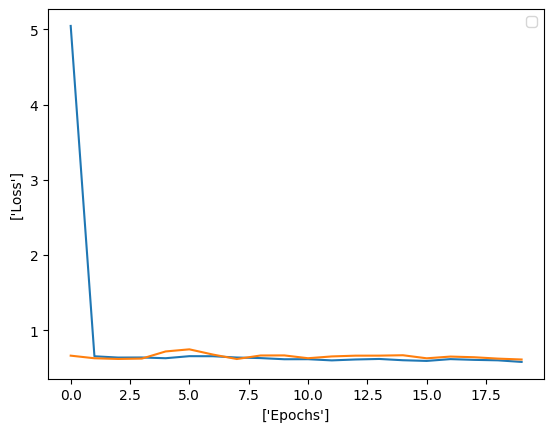

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['Loss'],['Valaidation Loss'])
plt.xlabel(['Epochs'])
plt.ylabel(['Loss'])
plt.show()

**Model with 2 blocks**

In [ ]:
model1 = Sequential()

In [ ]:
# block 1
model1.add(Conv2D(64,(3,3), input_shape=input_shape))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
# block 2
model1.add(Conv2D(128,(3,3), input_shape=input_shape))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
#classification
model1.add(Flatten())
model1.add(Dense(64))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_2 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 activation_3 (Activation)   (None, 72, 72, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                  

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
training1 =  model1.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs = epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)

Epoch 1/20


<ipython-input-23-d551c5c16371>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training1 =  model1.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs = epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)


100/100 [==============================] - 20s 178ms/step - loss: 1.3038 - accuracy: 0.5335 - val_loss: 0.6901 - val_accuracy: 0.5575
Epoch 2/20
100/100 [==============================] - 19s 193ms/step - loss: 0.6763 - accuracy: 0.5895 - val_loss: 0.6671 - val_accuracy: 0.6030
Epoch 3/20
100/100 [==============================] - 17s 172ms/step - loss: 0.6801 - accuracy: 0.5835 - val_loss: 0.6758 - val_accuracy: 0.5920
Epoch 4/20
100/100 [==============================] - 19s 193ms/step - loss: 0.6798 - accuracy: 0.5723 - val_loss: 0.6686 - val_accuracy: 0.6015
Epoch 5/20
100/100 [==============================] - 19s 192ms/step - loss: 0.6698 - accuracy: 0.5960 - val_loss: 0.6760 - val_accuracy: 0.5930
Epoch 6/20
100/100 [==============================] - 19s 191ms/step - loss: 0.6542 - accuracy: 0.6330 - val_loss: 0.6865 - val_accuracy: 0.6120
Epoch 7/20
100/100 [==============================] - 17s 171ms/step - loss: 0.6815 - accuracy: 0.5785 - val_loss: 0.6665 - val_accuracy: 0.6

<ipython-input-24-8ee410ddeb6c>:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(['Accuracy'],['Validation Vccuracy'])


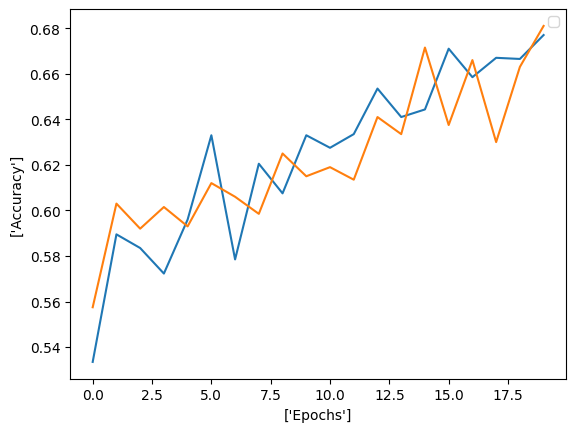

In [ ]:
plt.plot(training1.history['accuracy'])
plt.plot(training1.history['val_accuracy'])
plt.legend(['Accuracy'],['Validation Vccuracy'])
plt.xlabel(['Epochs'])
plt.ylabel(['Accuracy'])
plt.show()

<ipython-input-25-e4007fdec405>:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(['Loss'],['Valaidation Loss'])


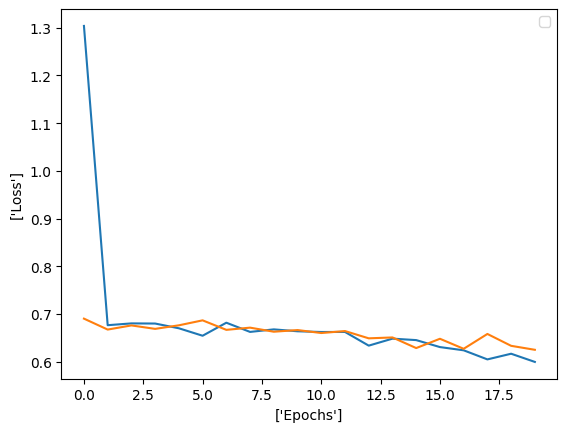

In [ ]:
plt.plot(training1.history['loss'])
plt.plot(training1.history['val_loss'])
plt.legend(['Loss'],['Valaidation Loss'])
plt.xlabel(['Epochs'])
plt.ylabel(['Loss'])
plt.show()

**Model with 3 blocks**

In [ ]:
model2 = Sequential()

In [ ]:
# block 1
model2.add(Conv2D(64,(3,3), input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
# block 2
model2.add(Conv2D(128,(3,3), input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
# block 3
model2.add(Conv2D(512,(3,3), input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
#classification
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Dense(128))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_5 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 activation_6 (Activation)   (None, 72, 72, 128)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                  

In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
training2 =  model1.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs = epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)

<ipython-input-30-f9317346ec6c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training2 =  model1.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs = epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)


Epoch 1/20
100/100 [==============================] - 19s 195ms/step - loss: 0.5974 - accuracy: 0.6801 - val_loss: 0.6088 - val_accuracy: 0.6855
Epoch 2/20
100/100 [==============================] - 17s 175ms/step - loss: 0.5865 - accuracy: 0.6855 - val_loss: 0.6055 - val_accuracy: 0.6900
Epoch 3/20
100/100 [==============================] - 19s 192ms/step - loss: 0.5710 - accuracy: 0.7060 - val_loss: 0.6835 - val_accuracy: 0.6380
Epoch 4/20
100/100 [==============================] - 19s 191ms/step - loss: 0.5637 - accuracy: 0.7205 - val_loss: 0.5790 - val_accuracy: 0.7190
Epoch 7/20
100/100 [==============================] - 18s 181ms/step - loss: 0.5673 - accuracy: 0.7145 - val_loss: 0.5708 - val_accuracy: 0.7245
Epoch 8/20
100/100 [==============================] - 17s 174ms/step - loss: 0.5500 - accuracy: 0.7355 - val_loss: 0.5908 - val_accuracy: 0.6960
Epoch 9/20
100/100 [==============================] - 18s 181ms/step - loss: 0.5541 - accuracy: 0.7150 - val_loss: 0.5626 - val_ac

In [ ]:
plt.plot(training2.history['accuracy'])
plt.plot(training2.history['val_accuracy'])
plt.legend(['Accuracy'],['Validation Vccuracy'])
plt.xlabel(['Epochs'])
plt.ylabel(['Accuracy'])
plt.show()

In [ ]:
plt.plot(training2.history['loss'])
plt.plot(training2.history['val_loss'])
plt.legend(['Loss'],['Valaidation Loss'])
plt.xlabel(['Epochs'])
plt.ylabel(['Loss'])
plt.show()

In [ ]:
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4005.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

In [ ]:
rslt = model2.predict(img_pred)


In [ ]:
rslt

In [ ]:
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

In [ ]:
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4004.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model
from keras import applications

In [ ]:
pre_trained_model = VGG16(input_shape=input_shape,include_top=False,weights='imagenet')

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
for layers in pre_trained_model.layers:
  print(layers)

In [ ]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Pre Trained Layer

In [ ]:
for layer in pre_trained_model.layers[:15]:
  layer.trainable = False

for layer in pre_trained_model.layers[15:]:
  layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

Custom Layer for Classification

In [ ]:
# Flatten the output layer to 1 dimention
from keras.layers.pooling.global_max_pooling2d import GlobalMaxPooling2D
x=GlobalMaxPooling2D()(last_output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(1,activation='sigmoid')(x)

In [ ]:
model3 = Model(pre_trained_model.input,x)

In [ ]:
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model3.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
training3 =  model3.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs = epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)

<ipython-input-47-38cdcc20c5b9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training3 =  model3.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs = epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)


Epoch 1/20
100/100 [==============================] - 26s 221ms/step - loss: 0.7305 - accuracy: 0.4790 - val_loss: 0.6932 - val_accuracy: 0.4990
Epoch 2/20
100/100 [==============================] - 26s 263ms/step - loss: 0.6933 - accuracy: 0.4950 - val_loss: 0.6932 - val_accuracy: 0.5010
Epoch 4/20
100/100 [==============================] - 23s 229ms/step - loss: 0.6933 - accuracy: 0.4912 - val_loss: 0.6932 - val_accuracy: 0.4975
Epoch 5/20
100/100 [==============================] - 21s 209ms/step - loss: 0.6933 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 6/20
100/100 [==============================] - 21s 211ms/step - loss: 0.6934 - accuracy: 0.4955 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 7/20
100/100 [==============================] - 26s 262ms/step - loss: 0.6931 - accuracy: 0.5255 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 8/20
100/100 [==============================] - 21s 210ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_ac